In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Live.csv')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7050, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## How many status ids are unique?

In [6]:
unique_status_ids = df['status_id'].nunique()
print("Number of unique status IDs:", unique_status_ids)


Number of unique status IDs: 6997


## How many columns contain null data?

In [7]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [8]:
df = df.drop(columns=['Column1','Column2','Column3','Column4'])

In [9]:
# Assuming df is your DataFrame
df['status_published'] = pd.to_datetime(df['status_published'])

# Create new columns for date and time
df['publish_date'] = df['status_published'].dt.date
df['publish_time'] = df['status_published'].dt.time

# Drop the original column if needed
# df = df.drop('status_published', axis=1)

# Print or use the updated DataFrame
df


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publish_date,publish_time
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,2016-09-24,02:58:00
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,2016-09-23,11:19:00
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,2016-09-21,23:03:00
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,2016-09-20,00:43:00


## How many video post has been made for live selling:

In [10]:
# Convert 'status_published' to datetime format
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')

# Count the number of video posts
video_count = df[df['status_type'] == 'video'].shape[0]

# Print the result
print("Number of video posts:", video_count)


Number of video posts: 2334


## How many total shares were made for the video post that was posted on 7/15/2017 at 10:52?

In [11]:
video_likes_count = df[(df['status_type'] == 'video') & (df['status_published'] == '2017-07-15 10:52:00')]['num_shares'].sum()

print("Number of shares for the video on 2017-07-15 10:52:00:", video_likes_count)


Number of shares for the video on 2017-07-15 10:52:00: 167


## How many likes have been given to the photo posted on 4/19/2018 at 22:26?

In [12]:
photo_likes_count = df[(df['status_type'] == 'photo') & (df['status_published'] == '2018-04-19 22:26:00')]['num_likes'].sum()

print("Number of likes for the photo on 4/19/2018 at 22:26:00:", photo_likes_count)

Number of likes for the photo on 4/19/2018 at 22:26:00: 379


In [13]:
df = df.drop(columns = ['status_published'])

In [14]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publish_date,publish_time
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,2016-09-24,02:58:00
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,2016-09-23,11:19:00
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,2016-09-21,23:03:00
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,2016-09-20,00:43:00


In [15]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [16]:
status_type_counts = df['status_type'].value_counts()
status_type_counts

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [17]:
status_type_counts1 = df['num_angrys'].value_counts()
status_type_counts1

0     6627
1      276
2       71
3       35
4       17
5        9
6        4
8        3
7        2
19       2
31       1
12       1
10       1
9        1
Name: num_angrys, dtype: int64

In [18]:
# Assuming df is your DataFrame
status_counts = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']].sum()
status_counts

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
link,23319,359,277,23286,19,12,2,0,0
photo,777373,68580,10951,766602,6197,2936,818,611,196
status,160156,13227,934,158968,570,428,40,141,9
video,661478,1499544,269997,567198,82951,5714,4050,966,593


In [19]:

max_values = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas']].idxmax()

result = df.loc[max_values.values.flatten()][['status_type', 'publish_date', 'publish_time']]
result

,status_type,publish_date,publish_time
1137,link,2015-08-02,04:45:00
1175,link,2015-06-17,04:21:00
524,link,2016-10-23,20:39:00
1137,link,2015-08-02,04:45:00
524,link,2016-10-23,20:39:00
525,link,2016-10-23,09:51:00
524,link,2016-10-23,20:39:00
1229,photo,2015-04-10,06:31:00
6659,photo,2017-11-24,02:23:00
726,photo,2016-05-11,02:47:00


In [20]:
df = df.drop(columns = ['publish_date','publish_time'])

In [21]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0


In [22]:
df.duplicated().sum()

53

In [23]:
df = df.drop_duplicates()

In [24]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      6997 non-null   object
 1   status_type    6997 non-null   object
 2   num_reactions  6997 non-null   int64 
 3   num_comments   6997 non-null   int64 
 4   num_shares     6997 non-null   int64 
 5   num_likes      6997 non-null   int64 
 6   num_loves      6997 non-null   int64 
 7   num_wows       6997 non-null   int64 
 8   num_hahas      6997 non-null   int64 
 9   num_sads       6997 non-null   int64 
 10  num_angrys     6997 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 656.0+ KB


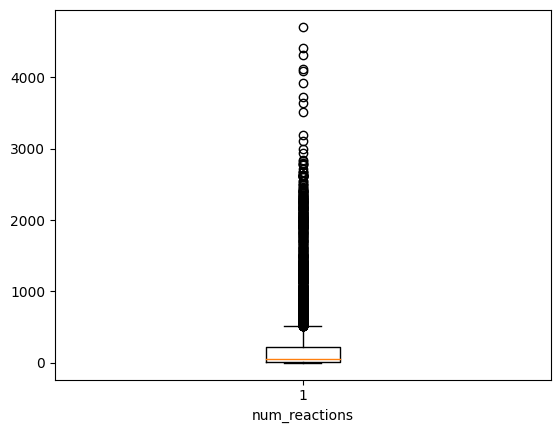

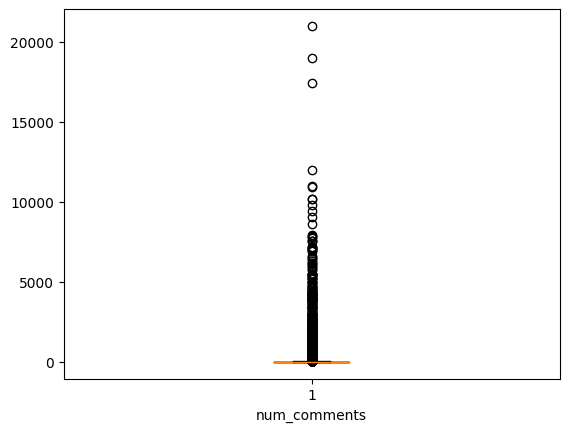

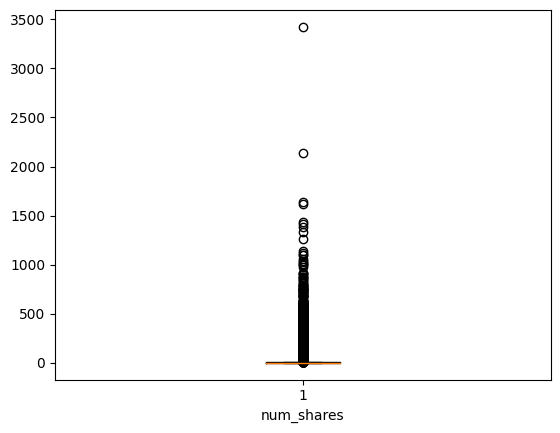

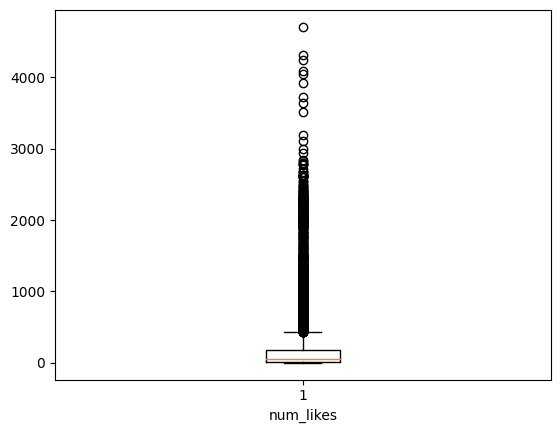

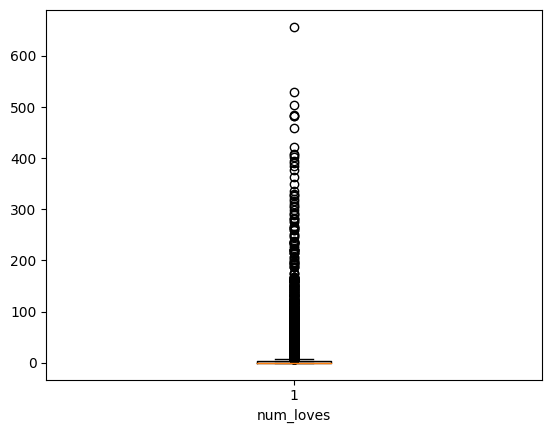

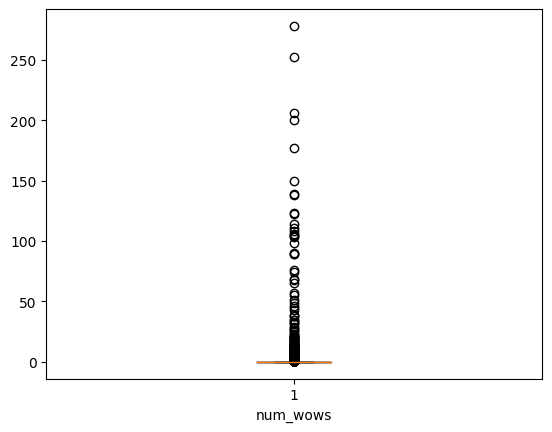

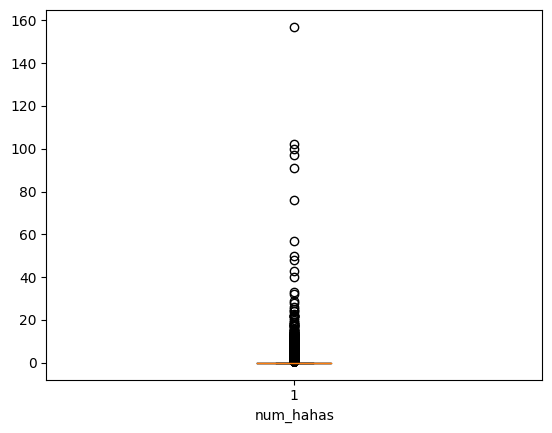

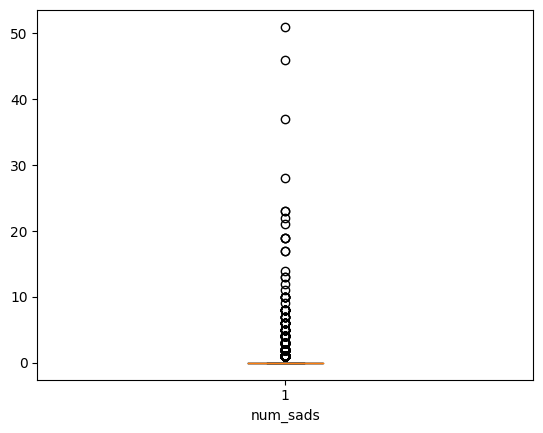

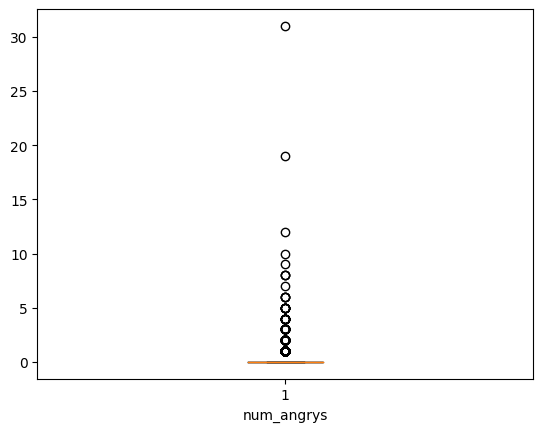

In [26]:
for col in df.columns:
    if df[col].dtype!= 'object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [27]:
#out_columns = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']

In [28]:
#for i in out_columns:
#    Q1=df[i].quantile(0.25)
#    Q3=df[i].quantile(0.75)
#    IQR=Q3-Q1
#    UW=Q3+1.5*IQR
#    LW=Q1-1.5*IQR
#    df=df[(df[i]>=LW) & (df[i]<=UW)]

In [29]:
for i in df.columns:
    if df[i].dtype!="object":
        p1=df[i].quantile(0.01)
        p2=df[i].quantile(0.99)
        df[i][df[i]<p1]=p1
        df[i][df[i]>p2]=p2

In [30]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529.0,512.0,262.0,432.0,92.0,3.0,1,1,0
1,246675545449582_1649426988507757,photo,150.0,0.0,0.0,150.0,0.0,0.0,0,0,0
2,246675545449582_1648730588577397,video,227.0,236.0,57.0,204.0,21.0,1.0,1,0,0
3,246675545449582_1648576705259452,photo,111.0,0.0,0.0,111.0,0.0,0.0,0,0,0
4,246675545449582_1645700502213739,photo,213.0,0.0,0.0,204.0,9.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89.0,0.0,0.0,89.0,0.0,0.0,0,0,0
7046,1050855161656896_1061334757275603,photo,16.0,0.0,0.0,14.0,1.0,0.0,1,0,0
7047,1050855161656896_1060126464063099,photo,2.0,0.0,0.0,1.0,1.0,0.0,0,0,0
7048,1050855161656896_1058663487542730,photo,351.0,12.0,22.0,349.0,2.0,0.0,0,0,0


In [31]:
df_drop=df.copy()
df_drop

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529.0,512.0,262.0,432.0,92.0,3.0,1,1,0
1,246675545449582_1649426988507757,photo,150.0,0.0,0.0,150.0,0.0,0.0,0,0,0
2,246675545449582_1648730588577397,video,227.0,236.0,57.0,204.0,21.0,1.0,1,0,0
3,246675545449582_1648576705259452,photo,111.0,0.0,0.0,111.0,0.0,0.0,0,0,0
4,246675545449582_1645700502213739,photo,213.0,0.0,0.0,204.0,9.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89.0,0.0,0.0,89.0,0.0,0.0,0,0,0
7046,1050855161656896_1061334757275603,photo,16.0,0.0,0.0,14.0,1.0,0.0,1,0,0
7047,1050855161656896_1060126464063099,photo,2.0,0.0,0.0,1.0,1.0,0.0,0,0,0
7048,1050855161656896_1058663487542730,photo,351.0,12.0,22.0,349.0,2.0,0.0,0,0,0


In [32]:
df_drop.drop(['status_id'],axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
for col in df_drop.columns:
    if df_drop[col].dtype=="object":
        df_drop[col]=le.fit_transform(df_drop[col])

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc=StandardScaler()

In [37]:
df_scaled=sc.fit_transform(df_drop)

In [38]:
df_scaled

array([[ 1.36742901,  0.72316765,  0.48734574, ...,  0.25345968,
         1.31436794, -0.22365358],
       [-0.75123813, -0.16544834, -0.31054216, ..., -0.30758346,
        -0.25905079, -0.22365358],
       [ 1.36742901,  0.01508842,  0.05723429, ...,  0.25345968,
        -0.25905079, -0.22365358],
       ...,
       [-0.75123813, -0.51245405, -0.31054216, ..., -0.30758346,
        -0.25905079, -0.22365358],
       [-0.75123813,  0.30582294, -0.29184166, ..., -0.30758346,
        -0.25905079, -0.22365358],
       [-0.75123813, -0.47728456, -0.31054216, ..., -0.30758346,
        -0.25905079, -0.22365358]])

In [39]:
df_scaled=pd.DataFrame(df_scaled,columns=df_drop.columns)

In [40]:
df_scaled

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.367429,0.723168,0.487346,2.126927,0.548531,2.502065,1.083702,0.253460,1.314368,-0.223654
1,-0.751238,-0.165448,-0.310542,-0.351119,-0.134687,-0.365242,-0.365565,-0.307583,-0.259051,-0.223654
2,1.367429,0.015088,0.057234,0.187998,-0.003858,0.289252,0.117524,0.253460,-0.259051,-0.223654
3,-0.751238,-0.256889,-0.310542,-0.351119,-0.229175,-0.365242,-0.365565,-0.307583,-0.259051,-0.223654
4,-0.751238,-0.017736,-0.310542,-0.351119,-0.003858,-0.084745,-0.365565,-0.307583,-0.259051,-0.223654
...,...,...,...,...,...,...,...,...,...,...
6992,-0.751238,-0.308471,-0.310542,-0.351119,-0.282475,-0.365242,-0.365565,-0.307583,-0.259051,-0.223654
6993,-0.751238,-0.479629,-0.310542,-0.351119,-0.464182,-0.334076,-0.365565,0.253460,-0.259051,-0.223654
6994,-0.751238,-0.512454,-0.310542,-0.351119,-0.495678,-0.334076,-0.365565,-0.307583,-0.259051,-0.223654
6995,-0.751238,0.305823,-0.291842,-0.143039,0.347442,-0.302909,-0.365565,-0.307583,-0.259051,-0.223654


In [41]:
df1 = df_scaled.copy()

## Using VIF to check Multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
cols=[]
for col in df1.columns:
    cols.append(col)

In [43]:
cols

['status_type',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [44]:
x = df1[cols]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,status_type,1.309242
1,num_reactions,781.601724
2,num_comments,3.305298
3,num_shares,5.766069
4,num_likes,735.839974
5,num_loves,10.429746
6,num_wows,1.688273
7,num_hahas,2.528167
8,num_sads,1.436692
9,num_angrys,1.588535


In [45]:
x.drop(['num_reactions'], axis = 1 , inplace =True )

In [46]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,status_type,1.302882
1,num_comments,3.099663
2,num_shares,5.691644
3,num_likes,1.112623
4,num_loves,5.070133
5,num_wows,1.492772
6,num_hahas,2.360122
7,num_sads,1.421101
8,num_angrys,1.570545


## KMeans Cluster Model

In [47]:
from sklearn.cluster import KMeans

In [48]:
K_values=list(range(2,8))

In [49]:
K_values

[2, 3, 4, 5, 6, 7]

In [50]:
ssd=[]
for K in K_values:
    Kmodel=KMeans(n_clusters=K,max_iter=150,random_state=1000)
    Kmodel.fit(df_scaled)
    ssd.append(Kmodel.inertia_)
    

In [51]:
K_values

[2, 3, 4, 5, 6, 7]

In [52]:
ssd

[47396.19858959853,
 37255.34820922981,
 30828.195652743423,
 26339.11645881636,
 23538.58627558926,
 21179.12903226414]

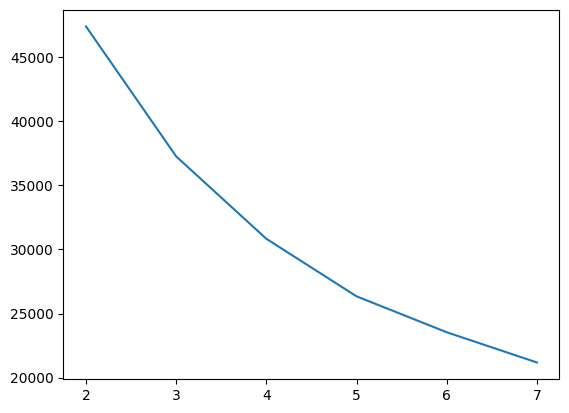

In [53]:
plt.plot(K_values,ssd)
plt.show()

In [54]:
final_model=KMeans(n_clusters=4,max_iter=150,random_state=1000)
final_model.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=1000)

In [55]:
final_model.labels_

array([3, 0, 0, ..., 0, 0, 0])

## Clustering based on status type

In [56]:
df["Cluster ID"]=final_model.labels_

In [57]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster ID
0,246675545449582_1649696485147474,video,529.0,512.0,262.0,432.0,92.0,3.0,1,1,0,3
1,246675545449582_1649426988507757,photo,150.0,0.0,0.0,150.0,0.0,0.0,0,0,0,0
2,246675545449582_1648730588577397,video,227.0,236.0,57.0,204.0,21.0,1.0,1,0,0,0
3,246675545449582_1648576705259452,photo,111.0,0.0,0.0,111.0,0.0,0.0,0,0,0,0
4,246675545449582_1645700502213739,photo,213.0,0.0,0.0,204.0,9.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89.0,0.0,0.0,89.0,0.0,0.0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,16.0,0.0,0.0,14.0,1.0,0.0,1,0,0,0
7047,1050855161656896_1060126464063099,photo,2.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0
7048,1050855161656896_1058663487542730,photo,351.0,12.0,22.0,349.0,2.0,0.0,0,0,0,0


In [58]:
df[df["Cluster ID"]==0]

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster ID
1,246675545449582_1649426988507757,photo,150.0,0.0,0.0,150.0,0.0,0.0,0,0,0,0
2,246675545449582_1648730588577397,video,227.0,236.0,57.0,204.0,21.0,1.0,1,0,0,0
3,246675545449582_1648576705259452,photo,111.0,0.0,0.0,111.0,0.0,0.0,0,0,0,0
4,246675545449582_1645700502213739,photo,213.0,0.0,0.0,204.0,9.0,0.0,0,0,0,0
5,246675545449582_1645650162218773,photo,217.0,6.0,0.0,211.0,5.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89.0,0.0,0.0,89.0,0.0,0.0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,16.0,0.0,0.0,14.0,1.0,0.0,1,0,0,0
7047,1050855161656896_1060126464063099,photo,2.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0
7048,1050855161656896_1058663487542730,photo,351.0,12.0,22.0,349.0,2.0,0.0,0,0,0,0


In [59]:
df[df["Cluster ID"]==1]

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster ID
99,246675545449582_1474958169287974,video,1493.0,1979.00,607.44,1333.0,139.00,9.00,3,4,1,1
293,246675545449582_1262985247151935,video,616.0,523.00,21.00,459.0,125.00,14.04,8,0,1,1
343,246675545449582_1229012967215830,video,1379.0,769.00,69.00,1131.0,198.08,4.00,4,2,3,1
413,246675545449582_1170184399765354,video,446.0,4342.04,120.00,352.0,80.00,7.00,5,0,2,1
482,246675545449582_1133476640102797,video,543.0,4342.04,178.00,397.0,136.00,2.00,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6894,1050855161656896_1369634396445636,video,247.0,3529.00,163.00,217.0,17.00,1.00,8,4,0,1
6906,1050855161656896_1367128250029584,video,407.0,4225.00,179.00,318.0,55.00,4.00,12,4,0,1
6974,1050855161656896_1341548359254240,video,300.0,4342.04,219.00,245.0,44.00,1.00,7,2,1,1
6977,1050855161656896_1339706342771775,video,253.0,4342.04,167.00,209.0,29.00,5.00,5,4,0,1


In [60]:
df[df["Cluster ID"]==2]

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster ID
112,246675545449582_1450141395102985,photo,1005.00,25.0,1.0,979.00,16.0,9.00,1,0,0,2
166,246675545449582_1404391233011335,photo,2293.16,633.0,257.0,2288.12,73.0,14.04,5,0,0,2
342,246675545449582_1230346027082524,photo,682.00,22.0,0.0,657.00,12.0,13.00,0,0,0,2
355,246675545449582_1222237971226663,photo,1186.00,37.0,1.0,1161.00,19.0,6.00,0,0,0,2
361,246675545449582_1215755648541562,status,1043.00,117.0,24.0,984.00,58.0,1.00,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6219,819700534875473_953048221540703,photo,1985.00,39.0,21.0,1961.00,11.0,12.00,0,1,0,2
6220,819700534875473_951614605017398,photo,985.00,71.0,42.0,962.00,5.0,14.04,2,0,0,2
6272,1050855161656896_1653424388066634,photo,1918.00,1.0,10.0,1917.00,0.0,1.00,0,0,0,2
6297,1050855161656896_1639234006152339,video,1228.00,6.0,1.0,1225.00,0.0,0.00,3,0,0,2


In [61]:
df[df["Cluster ID"]==3]

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster ID
0,246675545449582_1649696485147474,video,529.0,512.00,262.0,432.0,92.0,3.0,1,1,0,3
6,246675545449582_1645564175560705,video,503.0,614.00,72.0,418.0,70.0,10.0,2,0,3,3
7,246675545449582_1644824665634656,video,295.0,453.00,53.0,260.0,32.0,1.0,1,0,1,3
15,246675545449582_1628507150599741,video,332.0,100.00,30.0,303.0,23.0,1.0,5,0,0,3
42,246675545449582_1585003828283407,video,236.0,181.00,21.0,201.0,33.0,0.0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6958,1050855161656896_1346435248765551,video,96.0,880.00,35.0,85.0,8.0,1.0,0,2,0,3
6959,1050855161656896_1346375802104829,video,181.0,2641.00,131.0,154.0,21.0,4.0,2,0,0,3
6962,1050855161656896_1344669528942123,video,127.0,2303.00,109.0,106.0,19.0,2.0,0,0,0,3
6964,1050855161656896_1342672452475164,video,211.0,4342.04,135.0,186.0,22.0,1.0,0,1,1,3


In [62]:
df[df["Cluster ID"]==4]

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster ID


### Distinct clusters based on Num_comments vs Num,_loves

In [63]:
X = df_scaled.iloc[:, [2, 5]].values
X

array([[ 0.48734574,  2.50206483],
       [-0.31054216, -0.36524219],
       [ 0.05723429,  0.28925181],
       ...,
       [-0.31054216, -0.33407581],
       [-0.29184166, -0.30290942],
       [-0.31054216, -0.36524219]])

In [64]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([1, 0, 0, ..., 0, 0, 0])

<AxesSubplot: xlabel='Num_comments', ylabel='Num_loves'>

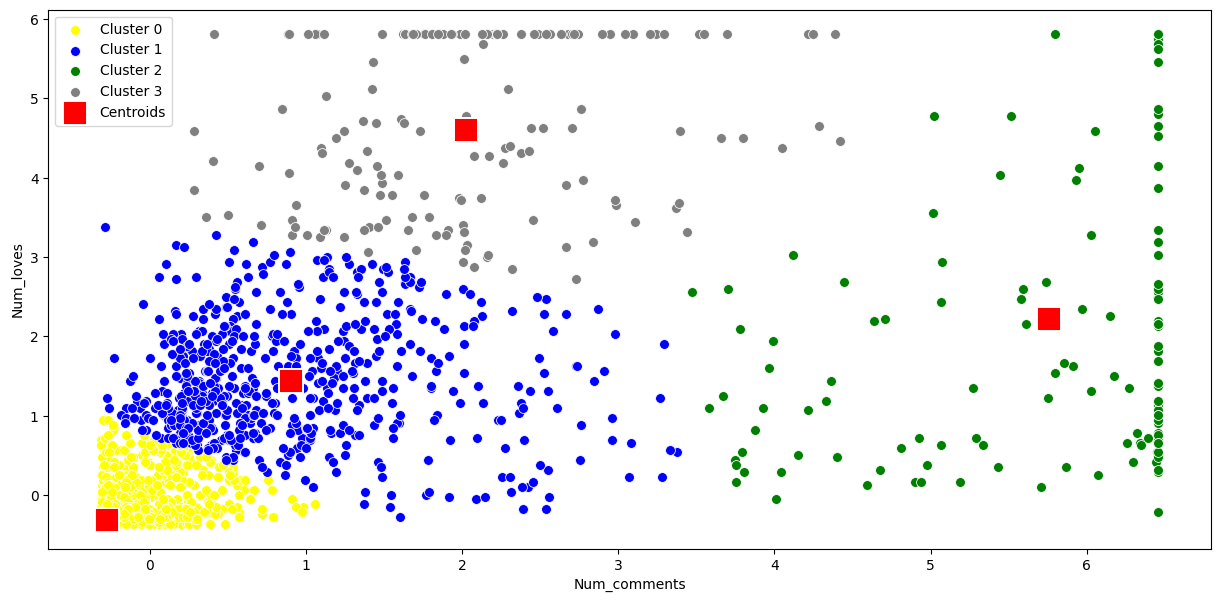

In [65]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("Num_comments")
plt.ylabel("Num_loves")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Distinct clusters based on Num_shares vs Num,_loves

In [66]:
X = df_scaled.iloc[:, [3, 5]].values
X

array([[ 2.12692667,  2.50206483],
       [-0.35111935, -0.36524219],
       [ 0.18799753,  0.28925181],
       ...,
       [-0.35111935, -0.33407581],
       [-0.14303915, -0.30290942],
       [-0.35111935, -0.36524219]])

In [67]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([3, 0, 0, ..., 0, 0, 0])

<AxesSubplot: xlabel='Num_shares', ylabel='Num_loves'>

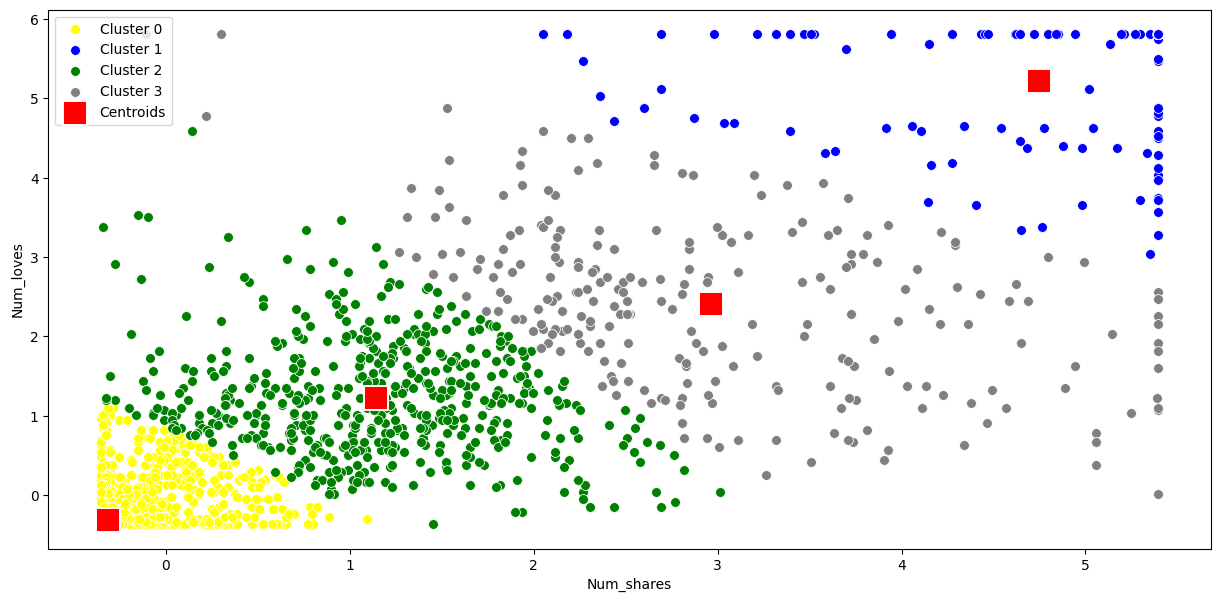

In [68]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("Num_shares")
plt.ylabel("Num_loves")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Distinct clusters based on Num_likes vs Num,_loves

In [69]:
X = df_scaled.iloc[:, [4, 5]].values
X

array([[ 0.54853082,  2.50206483],
       [-0.13468709, -0.36524219],
       [-0.00385813,  0.28925181],
       ...,
       [-0.49567812, -0.33407581],
       [ 0.34744186, -0.30290942],
       [-0.45691398, -0.36524219]])

In [70]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([1, 0, 0, ..., 0, 0, 0])

<AxesSubplot: xlabel='Num_likes', ylabel='Num_loves'>

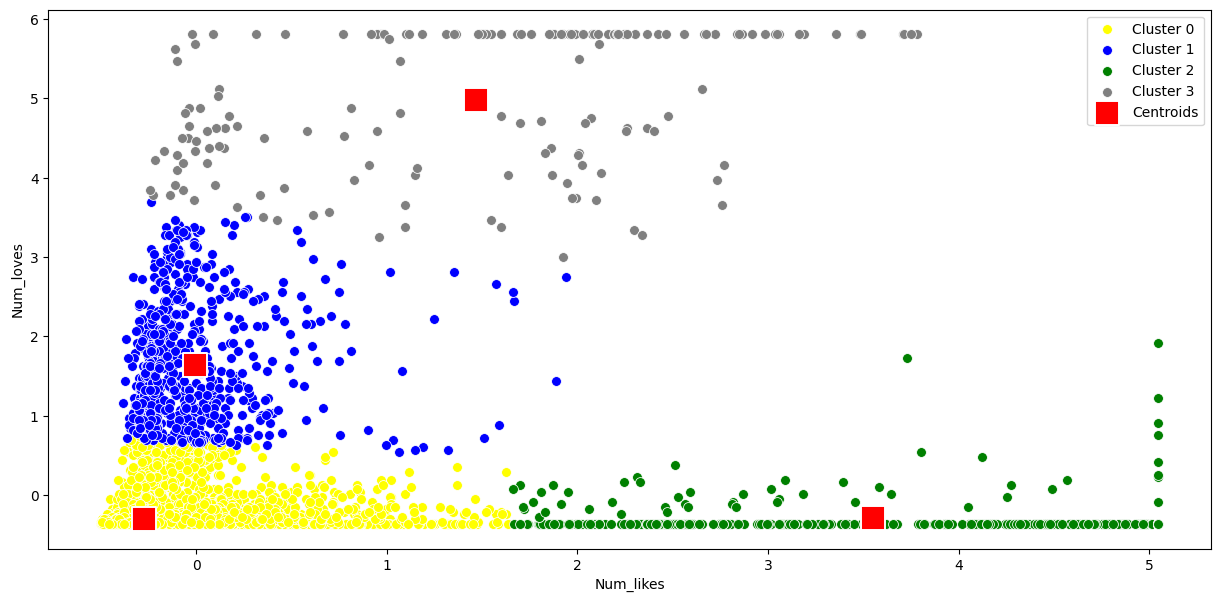

In [71]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("Num_likes")
plt.ylabel("Num_loves")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Variance Calculation

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(df_scaled)
labels = kmeans.labels_

print(labels)


[1 0 0 ... 0 0 0]


In [73]:
#inter_cluster_variance = kmeans.inertia_
#print("Inter-Cluster Variance:", inter_cluster_variance)